# Motivation letter

Hello, respected reader. <br>

I will try to persuade you I am a worthy addition to your team. <br>
What makes someone good at what they do? Or how to be the person one thinks is a good mathematician, researcher, trader, etc? <br>

I am __passionate__ about what I do:<br>
I have kept a regular studying regiment since Septermber 2019, my quest took me from psychology to dynamical systems and chaos, then programming, Computer Science and AI, to economics and finance. Various branches of mathematics were necessary to understand conceptes along the way: linear algebra, statistics, probability, game theory, networks and discrete mathematics. I believe knowledge I acquired is valuable and gives me decent problem solving skills.

Another quality is being __creative__<br>
I study creativity deliberately. I meditate regularly, I have learned to use various tools to help me come up with interesting solutions. Programming was the most useful addition to my repertiore of techiques, followed by mindfulness meditation, pen&paper note taking, and devoting time to purely artistic activities, like playing music.

__Sociability__ is another quality I think I have and I think may be valuable <br>
I have 10 years experience in teaching, developing communication skills made my life easier at the time. I studied negotiation out of curiosity. At some point I was a head instructor at a kitesurfing school, me and our manager together coordinated work of 10 instructors, so I believe I developed some leadership skills.

My __values__ are personal responsibility; challenges: trying new things, failing and coming back to try again; balance in life: having decent social security, giving back to the community; 

I try to have fun at what I do, but do not shy away at first sign of trouble

Cheers, 
Best wishes


# Case:

An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

### Solutions:

#### 1.
If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations 


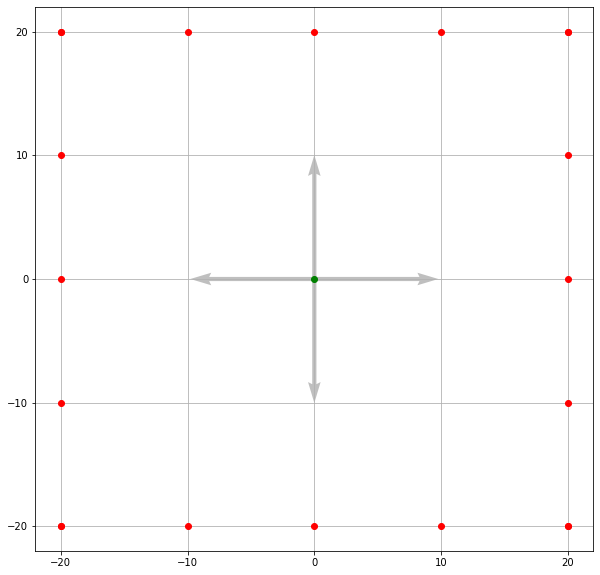

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
velocity = 10

movement_vectors = np.array([[0,velocity], [velocity,0], [0,-1*velocity], [-1*velocity,0]])

def plot_ant(ax, movement_vectors, scale = 45):
   
    origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point
    ax.quiver(*origin, movement_vectors[:,0], movement_vectors[:,1], scale = scale, alpha = 0.25)
    ax.plot(0,0, 'go', label = 'origin')
    

plot_ant(ax, movement_vectors, 45)

food = np.linspace(-20,20,5)
coord = np.full((len(food)),20)
a=permutations ([food, coord],2)
for i in a:
    for j in (1,-1):
        ax.plot(j*i[0],j*i[1],'ro')

def plot_grid(ax, scale = 20):
    major_ticks = np.arange(-1*scale, scale+1, 10)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid()
plot_grid(ax, scale=20)
plt.show()

### solution code:

Answer:
4.565 based on parameters: iterations: 1000 , distance from origin: 20, velocity: 10, 


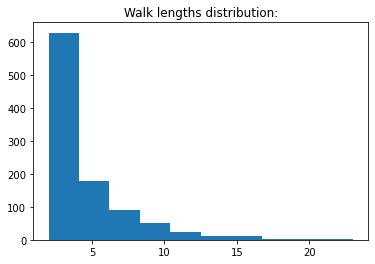

In [107]:
def distance (coord =(1,1)): #default value for testing purposes
    ''' Pythagoras theorem'''
    import math
    return math.sqrt(sum((i**2 for i in coord)))

def move(coord = (0,0), v=10):
    
    import random
    steps = ((0,v),(v,0),(0,-1*v),(-1*v,0))
    step = random.choice(steps)
    return [sum(x) for x in zip(coord,step)]

def simulate_1(limit=20, v = 10):
    coord =(0,0)    
    length = 0
    while distance (coord)<limit:
        length+=1
        coord = move(coord,v)
    return length, coord

iterations = 1000
velocity = 10
dist = 20
lengths =()
coords = ()
for i in range (iterations):
    l, c = simulate_1(dist,velocity)
    lengths+=l,
    coords+=c,
time = sum(lengths)/len(lengths)
print('Answer:')
print('{} based on parameters: iterations: {} , distance from origin: {}, velocity: {}, '.format(time, iterations, dist, velocity))
plt.title(label= 'Walk lengths distribution:')
plt.hist(lengths)
plt.show()


### 2.
What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?


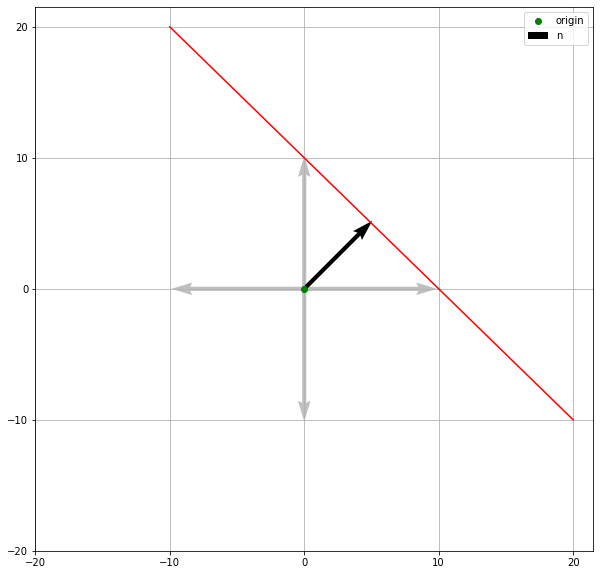

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_ant(ax,movement_vectors,scale = 42)
ax.quiver(5,5,scale = 41, label = 'n')
food_x = np.arange(-10,21,10)
food_y = 10-food_x
plt.plot(food_x,food_y, 'r-')
plot_grid(ax)
plt.legend()
plt.show()

### Solution:

Let $\vec{d}$ be a shortest path from the origin to food <br>

Let $V$ be a set of possivle movements for the ant. Expressing $V$ in terms of $d$ we see that the and move to the food or away from the food based on a result of a fair coin toss with the speed of 1 ,therefore can be viewed as a 1d problem without the loss of generality.<br>

Using the argument from [this lecture](https://web.mit.edu/neboat/Public/6.042/randomwalks.pdf), page 6, Definition 1) <br>

Assume there is an upper bound $T$, i.e. random walk will stop if the ant finds itself at some distance away from the anthill without any food <br>

Let S be number of steps to reach a boundary. Let $E_n = Ex(S|D_0=n)$ be expected time to reach a boundary if we start $n$ units from the border. <br>

Let $p = 1/2$ be probability to choose (right|up), $1-p$ probability to choose (left|down)
Recursive definition:<br>

$E_n = 0$,                          $if n=0$ <br>

$E_n = 1$,                          $if n=T$ <br>

$E_n = 1 +pE_{n+1} + (1-p)E_{n-1}, if 0<n<T$ <br>

Recurrence for the equations is: <br>

$pE_{n+1} - E_n + (1-p)E_{n-1} = -1$

This is a __linear inhomogeneous recurrence__, (homogeneous in case where $p \neq 1/2$) <br>

Solving the recurrence yields 

$E_n = mn, if p=1/2$, 

as $m \to \infty, E_n$ also approaches infinity

## Answer: $\infty$

### 3. Random walk within an arbitrary closed boundary. 
Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by <br>
$( \frac{x – 2.5cm} {30cm} )^2 + ( \frac{y – 2.5cm} {40cm} )^{2} < 1$ <br>
in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.


#### Visualize

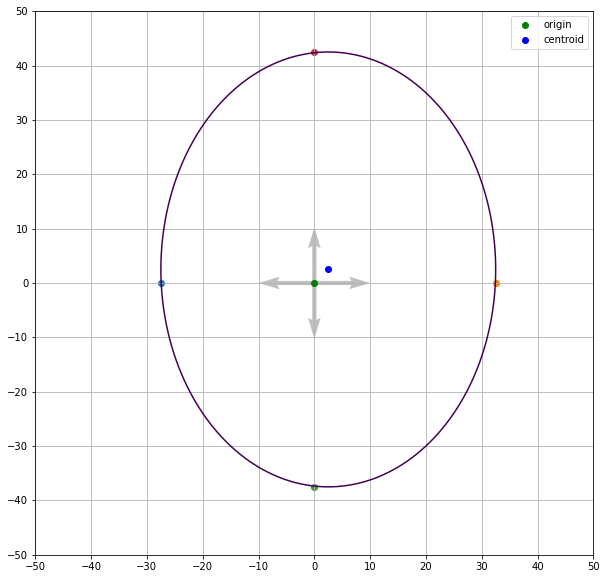

In [103]:
import numpy as np
import matplotlib.pyplot as plt

scale = 50
fig, ax = plt.subplots(figsize=(10, 10))
plot_ant(ax,movement_vectors,scale = 2*scale)
plot_grid(ax,scale)

def make_circle(x_offset = -2.5,y_offset = -2.5, x_aspect = 1/30,y_aspect = 1/40, r = 1):
    '''
    https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle
    '''
    resolution = 120
    x = np.linspace(-1.0*scale, 1.0*scale, resolution+1)
    y = np.linspace(-1.0*scale, 1.0*scale, resolution+1)
    X, Y = np.meshgrid(x,y)

    F = ((X+x_offset)*x_aspect)**2 + ((Y+y_offset)*y_aspect)**2 - r
    return X,Y,F 
X,Y,F = make_circle()
x,y,c = make_circle(0,0,1,1)

c_Y = Y[F==F.min()]
c_X = X[F==F.min()]
ax.plot(c_X, c_Y, 'bo', label = 'centroid')
ax.contour(X,Y,F,[0]) 
x0 = X[F==1]
y0 = Y[F==1]

#zeros:
plt.scatter(x0[0],0)
plt.scatter(x0[1],0)
plt.scatter(0,y0[0])
plt.scatter(0,y0[2])

plt.legend()
plt.show()

### Solution code:

In [106]:
v = 10
steps = np.array(((0,v),(v,0),(0,-1*v),(-1*v,0)))
start = np.array((0,0))
runs = 1000

def boundary(x,y):
    x_aspect = 1/30
    y_aspect = 1/40
    x_offset = -2.5
    y_offset = -2.5
    r = 1
    return ((x+x_offset)*x_aspect)**2 + ((y+y_offset)*y_aspect)**2 <= r

def move(steps):
    step = steps[np.random.choice(4)]
    return step
def simulate(coord, steps):
    x,y = coord[0],coord[1]
    path = ()
    while boundary(x,y):
        path += coord,
        coord = coord + move(steps)
        x,y = coord[0],coord[1]
    path+=coord,    
    path = np.array(path)
    return path

# run all
paths = ()
for i in range(runs):
    paths += sim(start, steps),

lengths = ()
for i in paths:
    lengths += len(i),

print('result:', np.mean(lengths))

result: 14.674


### Answer: 15

## Conclusion:
This problem set seems to be related to martingale stopping time, , gambler's ruin, etc. <br>
I have difficulty generalizing the arguments to two and more dimensions, even though I have found some materials on the topic. <br>
I did not pay enough attention to probability theory and random walks, given my interest in algotrading. I will include these into my studying regiment.

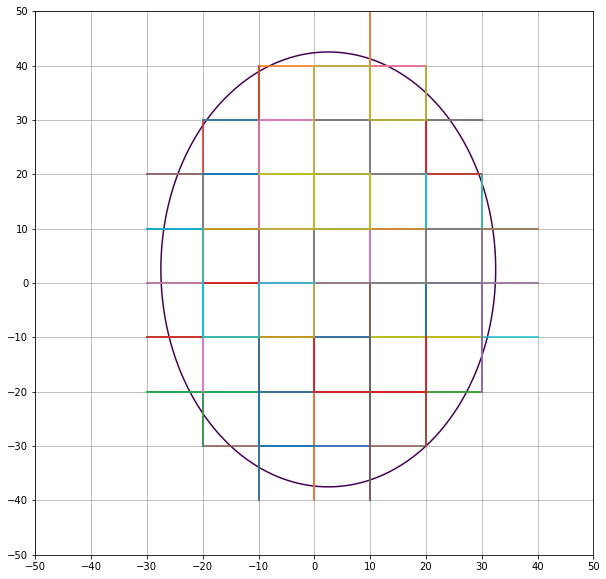

In [101]:
def plot_paths(paths):
    scale = 50
    fig, ax = plt.subplots(figsize=(10, 10))
    # plot_ant(ax,movement_vectors,scale = 2*scale)
    plot_grid(ax,scale)
    ax.contour(X,Y,F,[0]) 
    for path in paths:
        plt.plot(path[:,0],path[:,1])
    plt.show()

# plot_paths(paths)